## ARTS1422 Dimensionality Reduction

包佳诚2021533098

Implement at least three different methods of dimensionality reduction, such as Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Multidimensional scaling (MDS), and Uniform Manifold Approximation and Projection (UMAP). Apply each method to the dataset and obtain a reduced-dimensional representation of the data.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS


In [84]:
iris = load_iris()
X = iris.data

# z-score标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
iris.target_names
# setosa 0, versicolor 1, virginica 2
species_to_int = {name: i for i, name in enumerate(iris.target_names)}

### PCA

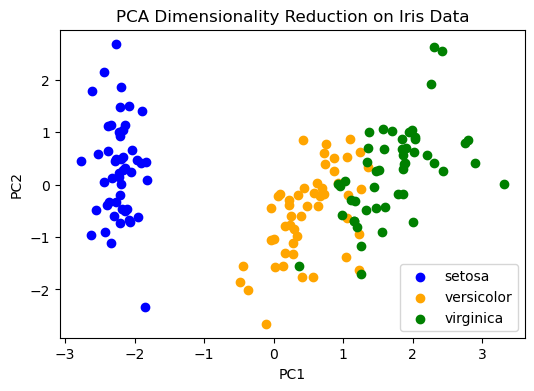

In [95]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# create dataframe
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = iris.target

# print(df_pca['species'])
plt.figure(figsize=(6, 4))

for species, color in zip(iris.target_names, ['blue', 'orange', 'green']):
    # print(species)
    # print((df_pca['species'] == species)[0:10])
    subset = df_pca[df_pca['species'] == species_to_int[species]]
    # print(subset['PC1'])
    plt.scatter(subset['PC1'], subset['PC2'], label=species, c=color)
    

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA Dimensionality Reduction on Iris Data')

plt.show()

# save to csv
df_pca.to_csv('../data/iris_pca.csv', index=False)

### t-SNE

/Users/bjc/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


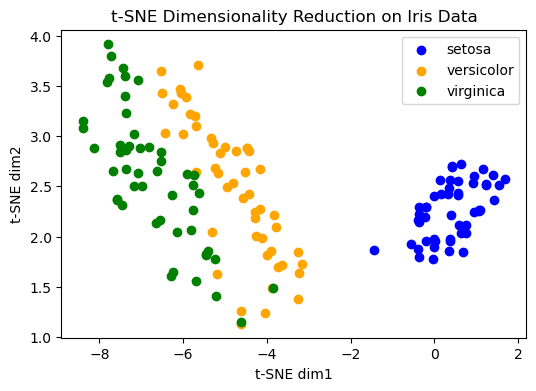

In [94]:
X_tsne = TSNE(n_components=2, learning_rate=100, random_state=15, perplexity=70).fit_transform(X_scaled)

df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['species'] = iris.target


plt.figure(figsize=(6, 4))
for species, color in zip(iris.target_names, ['blue', 'orange', 'green']):
    subset = df_tsne[df_tsne['species'] == species_to_int[species]]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=species, c=color)

plt.xlabel('t-SNE dim1')
plt.ylabel('t-SNE dim2')
plt.legend()
plt.title('t-SNE Dimensionality Reduction on Iris Data')
plt.show()


df_tsne.to_csv('../data/iris_tsne.csv', index=False)

### MDS

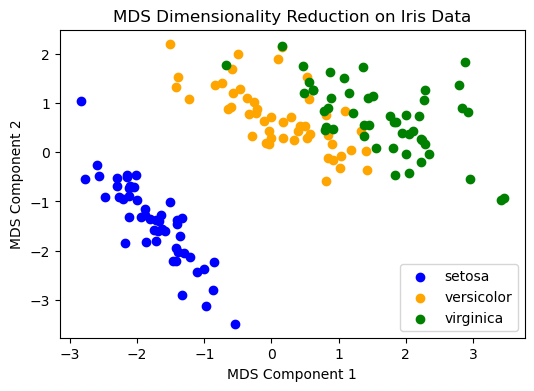

In [93]:
mds = MDS(n_components=2, random_state=100)
X_mds = mds.fit_transform(X_scaled)

df_mds = pd.DataFrame(data=X_mds, columns=['MDS1', 'MDS2'])
df_mds['species'] = iris.target

plt.figure(figsize=(6, 4))
for species, color in zip(iris.target_names, ['blue', 'orange', 'green']):
    subset = df_mds[df_mds['species'] == species_to_int[species]]
    plt.scatter(subset['MDS1'], subset['MDS2'], label=species, c=color)

plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend()
plt.title('MDS Dimensionality Reduction on Iris Data')
plt.show()


df_mds.to_csv('../data/iris_mds.csv', index=False)